In [1]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
# ふた山の正規分布を重ねて混合分布を作成
a = np.random.normal(1, 1, 100)
b = np.random.normal(3, 1, 200)
X = np.r_[a, b]

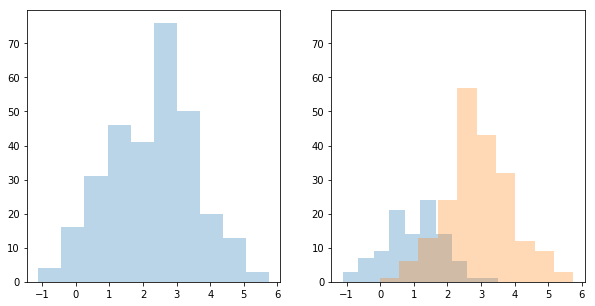

In [3]:
# ヒストグラムで可視化
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(X, bins=10, alpha=.3)
ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
ax2.hist(a, bins=10, alpha=.3)
ax2.hist(b, bins=10, alpha=.3)
plt.show()

In [4]:
# 混合正規分布の推定
# クラスタ数3
gmm = GaussianMixture(n_components=3, verbose=0, max_iter=1000)
gmm.fit(X.reshape(-1, 1))
score = gmm.score(X.reshape(-1, 1))

In [5]:
# 平均、分散、重み
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

[[3.72493699]
 [0.92866117]
 [2.57798817]]
[[[0.62185511]]

 [[0.59401115]]

 [[0.30089951]]]
[0.24274153 0.36207295 0.39518552]


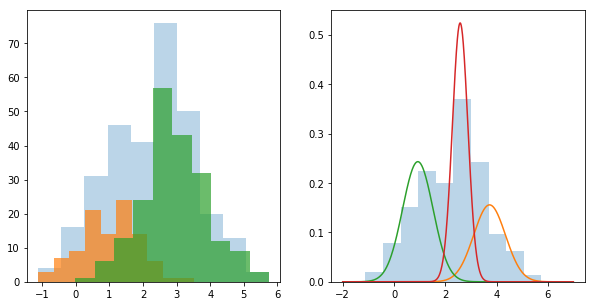

In [6]:
# 可視化
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(X, bins=10, alpha=.3)
ax1.hist(a, bins=10, alpha=.7)
ax1.hist(b, bins=10, alpha=.7)

# プロット
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(X, bins=10, alpha=.3, normed=True)
xx = np.arange(-2, 7, 0.01)
for m, s, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    yy = norm.pdf(xx, m, s[0])
    ax2.plot(xx, w*yy)
plt.show()

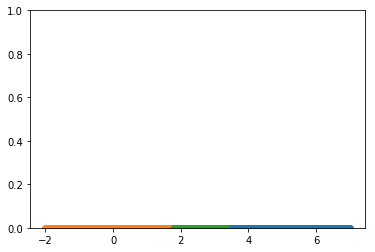

In [7]:
# 帰属クラスタ
yy = gmm.predict(xx.reshape(-1, 1))
plt.figure()
for label in range(3):
    idx = yy==label
    yy_label = np.zeros(sum(idx))
    xx_label = xx[idx]
    plt.plot(xx_label, yy_label, 'o')
plt.ylim(0, 1)
plt.show()

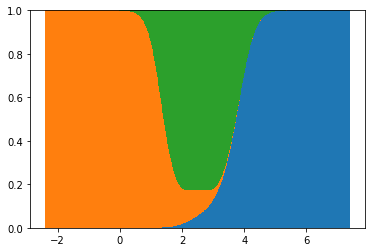

In [8]:
# 帰属度の可視化
height = gmm.predict_proba(xx.reshape(-1, 1))
plt.figure()
plt.bar(xx, height[:, 0])
plt.bar(xx, height[:, 1], bottom=height[:,0])
plt.bar(xx, height[:, 2], bottom=height[:,0]+height[:,1])
plt.show()

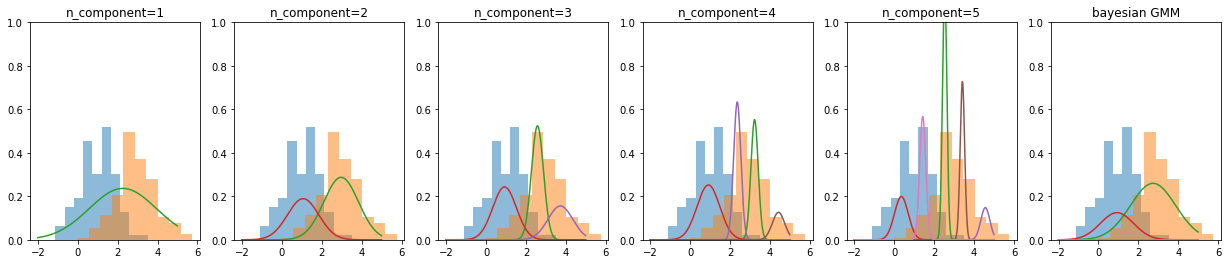

In [9]:
# ヒストグラムと推定した正規分布の重ね合わせ
comps = 5
axes = []
fig = plt.figure(figsize=(25, 4))
xx = np.arange(-2, 5, 0.01)

for i in range(1, comps+1):
    # 混合正規分布の推定
    gmm = GaussianMixture(n_components=i, verbose=0, max_iter=1000)
    gmm.fit(X.reshape(-1, 1))
    
    # プロット
    axes.append(fig.add_subplot(1, comps+2, i))
    axes[i-1].set_title('n_component={}'.format(i))
    axes[i-1].set_ylim([0, 1])
    axes[i-1].hist(a, alpha=.5, normed=True)
    axes[i-1].hist(b, alpha=.5, normed=True)
    
    for m, s, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        yy = norm.pdf(xx, m, s[0])
        axes[i-1].plot(xx, w*yy)

# ベイズ型混合正規分布で適当なクラスター数を自動的に決定
bgmm = BayesianGaussianMixture(n_components=5, verbose=0, max_iter=1000)
bgmm.fit(X.reshape(-1, 1))

# プロット
axes.append(fig.add_subplot(1, comps+2, comps+1))
axes[-1].set_title('bayesian GMM')
axes[-1].set_ylim([0, 1])
axes[-1].hist(a, alpha=.5, normed=True)
axes[-1].hist(b, alpha=.5, normed=True)
for m, s, w in zip(bgmm.means_, bgmm.covariances_, bgmm.weights_):
    yy = norm.pdf(xx, m, s[0])
    axes[-1].plot(xx, w*yy)